In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
file = 'PS_6_Industry_Momentum.xlsx'

In [3]:
# import data

In [4]:
# import factors
factors = pd.read_excel(file, sheet_name='factors', parse_dates=["date"], index_col='date')
factors.head()

,RF,Mkt-RF
date,,
1926-07-31,0.0022,0.0262
1926-08-31,0.0025,0.0256
1926-09-30,0.0023,0.0036
1926-10-31,0.0032,-0.0343
1926-11-30,0.0031,0.0244


In [5]:
# import industry portfolios
portfolio_returns = pd.read_excel(file, sheet_name='industry_portfolios', parse_dates=["date"], index_col='date')
portfolio_returns.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0053,-0.0519,0.0129,0.0230,0.1097,-0.0050,0.0808,0.0164,0.0792,0.0068,...,0.0083,0.0922,0.0206,0.0766,0.0191,-0.2379,-0.0294,0.0183,0.0016,0.0520
1926-08-31,0.0271,0.2703,0.0653,0.0054,0.1001,-0.0358,-0.0251,0.0451,0.0541,0.0749,...,0.0217,0.0202,0.0440,-0.0237,0.0487,0.0539,-0.0056,-0.0009,0.0438,0.0676
1926-09-30,0.0129,0.0402,0.0122,0.0592,-0.0099,0.0071,-0.0051,0.0061,0.0537,0.0240,...,0.0241,0.0225,0.0018,-0.0555,0.0006,-0.0787,0.0017,-0.0058,-0.0136,-0.0386
1926-10-31,-0.0313,-0.0331,0.0107,-0.0441,0.0947,-0.0466,0.0012,-0.0073,-0.0479,0.0007,...,-0.0011,-0.0200,-0.0108,-0.0503,-0.0265,-0.1538,-0.0534,-0.0413,-0.0509,-0.0849
1926-11-30,0.0628,0.0729,0.0441,0.0260,-0.0580,-0.0051,0.0187,0.0553,0.0534,0.0348,...,0.0163,0.0377,0.0364,0.0381,0.0159,0.0467,0.0404,0.0432,0.0229,0.0400


# 6.1 Industry ranks

In [6]:
roll_avg = portfolio_returns.shift().rolling(12).mean().dropna()

In [7]:
# ranking with a help of rank method
ranks = roll_avg.rank(axis=1, method="min")

In [8]:
ranks.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1927-07-31,14.0,30.0,24.0,3.0,29.0,7.0,17.0,20.0,28.0,25.0,...,15.0,26.0,23.0,4.0,18.0,1.0,6.0,16.0,13.0,5.0
1927-08-31,15.0,30.0,27.0,3.0,26.0,8.0,10.0,22.0,29.0,28.0,...,13.0,19.0,24.0,5.0,16.0,1.0,9.0,14.0,17.0,4.0
1927-09-30,14.0,17.0,26.0,4.0,24.0,10.0,13.0,18.0,30.0,22.0,...,9.0,27.0,25.0,5.0,8.0,1.0,20.0,16.0,15.0,3.0
1927-10-31,13.0,17.0,27.0,3.0,29.0,8.0,12.0,20.0,30.0,19.0,...,10.0,22.0,25.0,7.0,9.0,1.0,21.0,15.0,16.0,4.0
1927-11-30,13.0,18.0,24.0,3.0,23.0,10.0,20.0,27.0,30.0,15.0,...,9.0,28.0,21.0,12.0,8.0,1.0,19.0,16.0,25.0,5.0


In [9]:
print("Lowest average rank: ", ranks.mean().idxmin(), "(" + str(round(ranks.mean().min(),2)) + ")")
print("Highest average rank:", ranks.mean().idxmax(), "(" + str(round(ranks.mean().max(),2)) + ")")

Lowest average rank:  Telcm (14.09)
Highest average rank: ElcEq (17.17)


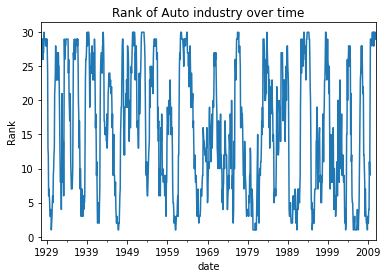

In [10]:
#Plot the rank of Autos industry
ranks.loc[:, "Autos"].plot()
plt.title("Rank of Auto industry over time")
plt.ylabel("Rank")
plt.show()

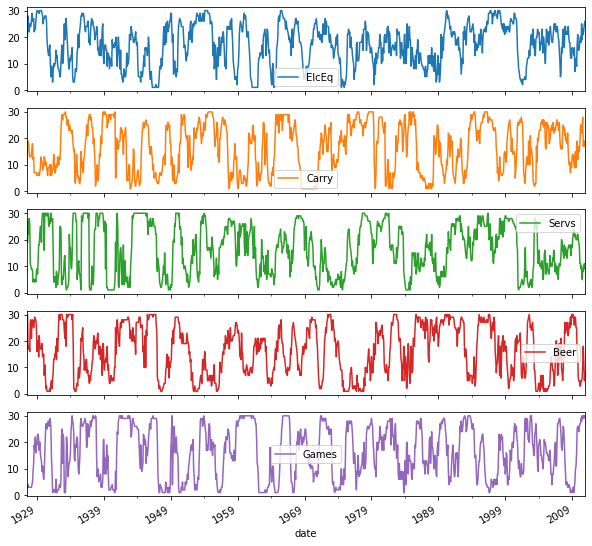

In [11]:
# select top 5 industries
top_inds = ranks.mean().nlargest(5).index
ranks.loc[:, top_inds].plot(subplots=True, figsize=(10,10));

# Winner portfolios

In [12]:
# find winners

In [13]:
winners = ranks > 15

In [14]:
winners = (winners * portfolio_returns) # winners is Boolean interpretes as 1 and 0
winners

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,-0,-0,-0.0006,-0.0121,-0,-0,-0.0717,-0,0,-0,...,-0.0195,-0,-0,-0.0607,-0.0516,-0.0756,-0,0.0049,-0,-0
2010-09-30,0,0.0494,0.1004,0.1431,0,0.038,0.1733,0,0.1001,0,...,0.0794,0,0,0,0.1021,0,0,0.0735,0,0
2010-10-31,0,0,0.0528,0.1271,0,0,0.0354,0,0.0839,0.0326,...,0.0441,0,0,0.0352,0.0551,0,0,0.0602,0,-0


In [15]:
winners = winners.dropna().sum(axis=1) / 15 - factors.loc[:, "RF"]
winners

date
1926-07-31         NaN
1926-08-31         NaN
1926-09-30         NaN
1926-10-31         NaN
1926-11-30         NaN
                ...   
2010-08-31   -0.045267
2010-09-30    0.110133
2010-10-31    0.062560
2010-11-30    0.036500
2010-12-31    0.059200
Length: 1014, dtype: float64

In [16]:
def analyze_performance(monthly_returns):
    # monthly performance 
    avg = monthly_returns.mean()
    sd = monthly_returns.std()
    sr = avg / sd
    #annualized performance
    avg_ann = avg * 12
    sd_ann = sd * np.sqrt(12)
    sr_ann = avg_ann / sd_ann
    # format in percent
    avg, avg_ann = str(round(avg * 100, 2)) + "%", str(round(avg_ann * 100, 2)) + "%"
    sd, sd_ann = str(round(sd * 100, 2)) + "%", str(round(sd_ann * 100, 2)) + "%"
    # create output
    stats = pd.DataFrame([[avg, sd, round(sr, 2)],
                          [avg_ann, sd_ann, round(sr_ann, 2)]],
                        columns=["Mean", "Std", "SR"],
                        index=["Monthly", "Annual"])  
    
    return stats

In [17]:
analyze_performance(winners)

,Mean,Std,SR
Monthly,0.95%,5.7%,0.17
Annual,11.43%,19.76%,0.58


# Loser Portfolios

In [23]:
losers = ((ranks <=15) * portfolio_returns).dropna().sum(axis=1) / 15 - factors.loc[:, "RF"]

In [24]:
analyze_performance(losers)

,Mean,Std,SR
Monthly,0.49%,5.94%,0.08
Annual,5.85%,20.58%,0.28


In [25]:
# overall market index portfolio
analyze_performance(factors.loc["1927-07-31":, "Mkt-RF"])

,Mean,Std,SR
Monthly,0.62%,5.49%,0.11
Annual,7.4%,19.02%,0.39


# 6.4 Long-short industry momentum

In [26]:
indmom = winners - losers
analyze_performance(indmom)

,Mean,Std,SR
Monthly,0.46%,2.63%,0.18
Annual,5.58%,9.12%,0.61


In [28]:
y = indmom.dropna()
x = factors.loc[:, "Mkt-RF"].reindex(y.index) # to have the same dimension (starting from 1927 year)

regression = sm.OLS(y , sm.add_constant(x)).fit()

alpha = regression.params.loc["const"]
beta = regression.params.loc["Mkt-RF"]

print("Alpha:", str(round(alpha * 100, 2)) + "%", "t-stat:", round(regression.tvalues.loc["const"], 2))
print("Beta:", round(beta, 3), "t-stat", round(regression.tvalues.loc["Mkt-RF"], 2))
print("Annualized alpha:", str(round(alpha * 100 * 12, 2)) + "%")

Alpha: 0.49% t-stat: 5.83
Beta: -0.036 t-stat -2.37
Annualized alpha: 5.84%


# Cumulative return

In [32]:
# put all together
rets = pd.DataFrame([winners, losers, indmom, factors.loc[:, "Mkt-RF"]]).T
rets = rets.add(factors.loc[:, "RF"], axis=0).dropna()
rets.columns = ["Winner", "Loser", "Indmom", "MKT"]
rets

,Winner,Loser,Indmom,MKT
date,,,,
1927-07-31,0.076453,0.067733,0.011720,0.0757
1927-08-31,0.024767,0.026393,0.001173,0.0270
1927-09-30,0.051960,0.043473,0.010587,0.0490
1927-10-31,-0.021627,-0.034647,0.015520,-0.0419
1927-11-30,0.080540,0.064467,0.018173,0.0687
...,...,...,...,...
2010-08-31,-0.045167,-0.046307,0.001240,-0.0439
2010-09-30,0.110233,0.096907,0.013427,0.0925
2010-10-31,0.062660,0.035020,0.027740,0.0390


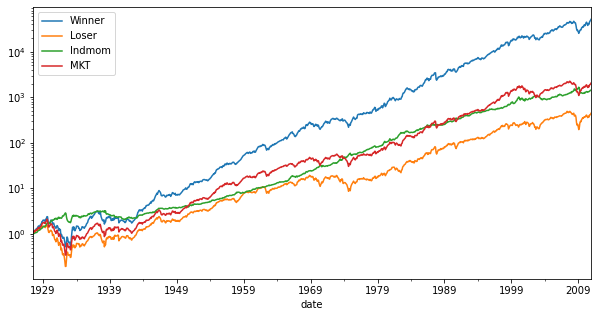

In [34]:
# compute cumulative return
cum_rets = (1+rets).cumprod()
# visualize returns on a log-scale
cum_rets.plot(logy=True, figsize=(10,5));

# Industry momentum loss

In [35]:
losses = rets.loc["2009", "Indmom"].nsmallest(3)
losses.sort_index()

date
2009-03-31   -0.040513
2009-04-30   -0.185413
2009-05-31   -0.046187
Name: Indmom, dtype: float64

In [36]:
rets.loc[losses.index,:].sort_index()

,Winner,Loser,Indmom,MKT
date,,,,
2009-03-31,0.073987,0.114600,-0.040513,0.0877
2009-04-30,0.076440,0.261953,-0.185413,0.1105
2009-05-31,0.033527,0.079713,-0.046187,0.0673


# Optimizing portfolio size

In [57]:
def indmom_performance(ranks, portfolio_returns, N):
    
    winner_cutoff = 30 - N
    loser_cutoff = N
    winners = ((ranks > winner_cutoff) * portfolio_returns).sum(axis=1) / N
    losers = ((ranks <= loser_cutoff) * portfolio_returns).sum(axis=1) / N
    indmom = winners - losers
    sr = (indmom.mean() * 12) / (indmom.std() * np.sqrt(12))
    
    return sr

In [58]:
Ns = np.arange(1,16)
sr = []

for N in Ns: 
    sr.append(indmom_performance(ranks, portfolio_returns, N))

sr = pd.Series(sr, index=Ns)

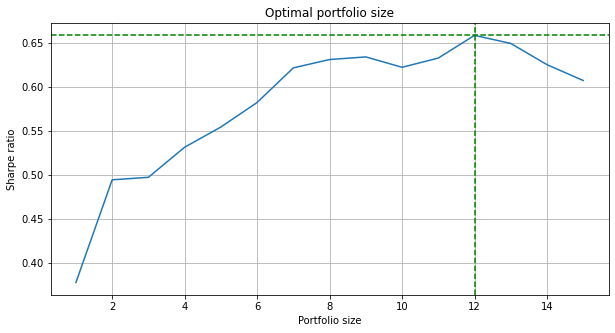

In [59]:
sr.plot(figsize=(10,5), grid=True)
plt.axvline(x=sr.idxmax(), ls="--", c="g")
plt.axhline(y=sr.max(), ls ="--", c="g")
plt.title("Optimal portfolio size")
plt.xlabel("Portfolio size")
plt.ylabel("Sharpe ratio")
plt.show()